In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/heart_cleveland_upload.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  


In [ ]:
print(df.isnull().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [ ]:
def detect_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = data[(data < lower_bound) | (data > upper_bound)].tolist()
  return outliers

numerical_column=['trestbps','chol','thalach','oldpeak']
# Iterate through each column and detect outliers
for column in numerical_column:
  if pd.api.types.is_numeric_dtype(df[column]):  # Check if column is numeric
    outliers = detect_outliers_iqr(df[column])
    if outliers:
      print(f"Outliers detected in column '{column}': {outliers}")
      # Replace outliers with the mean value of the column
      mean_value = df[column].mean()
      df[column] = np.where(df[column].isin(outliers), mean_value, df[column])
      print(f"Outliers in '{column}' replaced with mean: {mean_value}")

Outliers detected in column 'trestbps': [178, 192, 180, 172, 178, 180, 174, 200, 180]
Outliers in 'trestbps' replaced with mean: 131.69360269360268
Outliers detected in column 'chol': [564, 417, 407, 394, 409]
Outliers in 'chol' replaced with mean: 247.35016835016836
Outliers detected in column 'thalach': [71]
Outliers in 'thalach' replaced with mean: 149.5993265993266
Outliers detected in column 'oldpeak': [4.2, 6.2, 4.4, 5.6, 4.2]
Outliers in 'oldpeak' replaced with mean: 1.0555555555555556


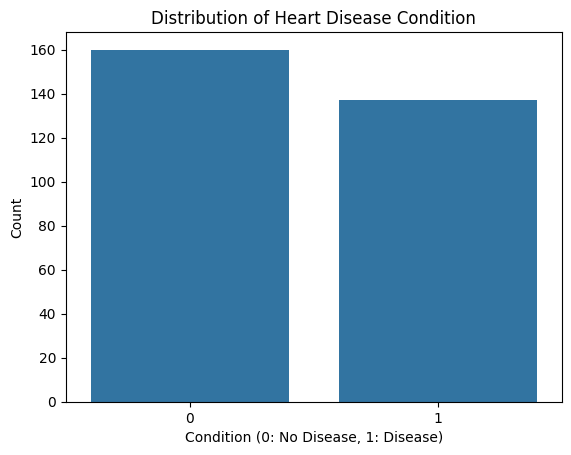

In [ ]:
import seaborn as sns

sns.countplot(x='condition', data=df)
plt.title('Distribution of Heart Disease Condition')
plt.xlabel('Condition (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.show()

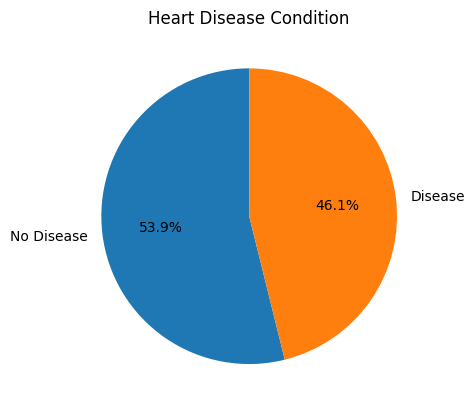

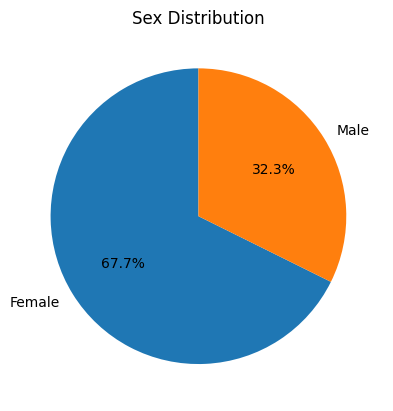

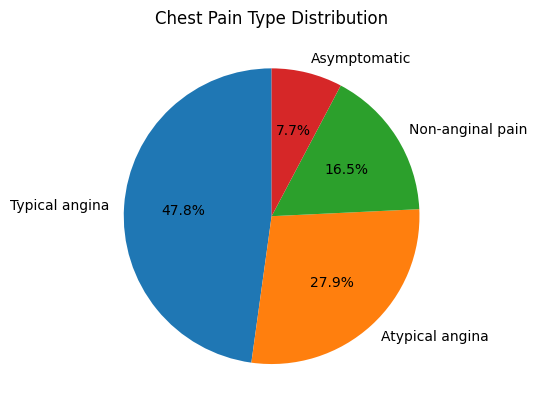

In [ ]:
# Pie chart for heart disease condition
disease_counts = df['condition'].value_counts()
plt.pie(disease_counts, labels=['No Disease', 'Disease'], autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Condition')
plt.show()

# Pie chart for other features (e.g., sex)
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Sex Distribution')
plt.show()

# Pie chart for chest pain type
cp_counts = df['cp'].value_counts()
plt.pie(cp_counts, labels=['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'], autopct='%1.1f%%', startangle=90)
plt.title('Chest Pain Type Distribution')
plt.show()

# You can create more pie charts for other features like FBS, restecg, etc.
# Replace 'sex', 'cp' with the desired feature column name.

**Support Vector Machine**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X = df.drop('condition',axis=1)
y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8063)

clf = LinearSVC(C=0.01,tol= 0.01)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy of SVM is: ",accuracy_score(y_test,y_pred))

print("Classification report of SVM is:\n",classification_report(y_test,y_pred))

Accuracy of SVM is:  0.8403361344537815
Classification report of SVM is:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        62
           1       0.88      0.77      0.82        57

    accuracy                           0.84       119
   macro avg       0.85      0.84      0.84       119
weighted avg       0.84      0.84      0.84       119



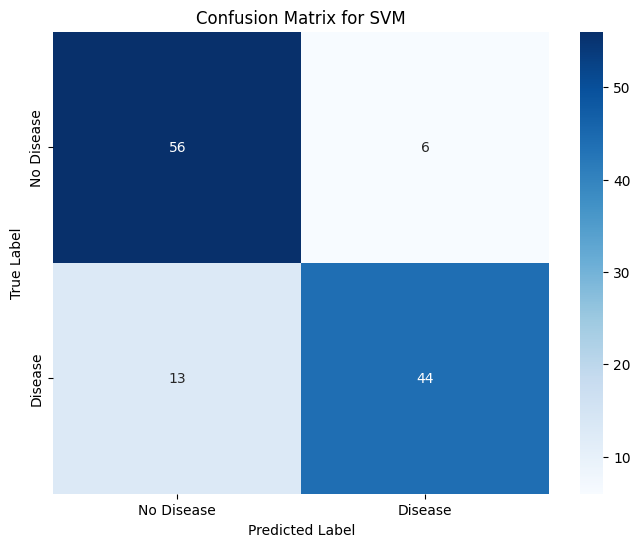

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=40)

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8319327731092437

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85        62
           1       0.88      0.75      0.81        57

    accuracy                           0.83       119
   macro avg       0.84      0.83      0.83       119
weighted avg       0.84      0.83      0.83       119



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


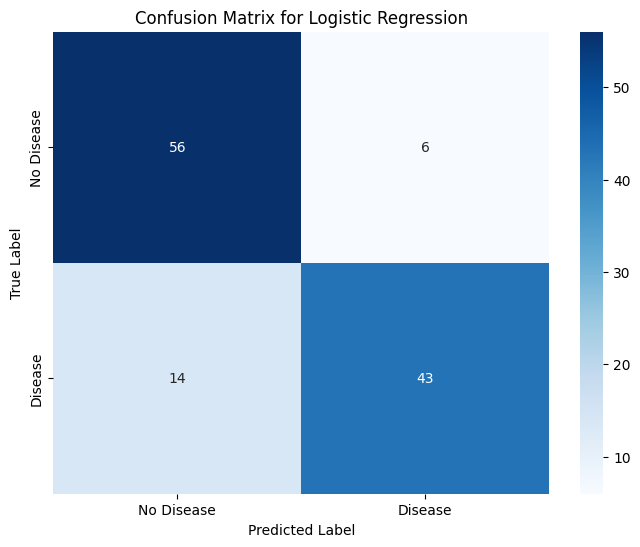

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your Logistic Regression
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6554621848739496

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        62
           1       0.66      0.58      0.62        57

    accuracy                           0.66       119
   macro avg       0.66      0.65      0.65       119
weighted avg       0.66      0.66      0.65       119



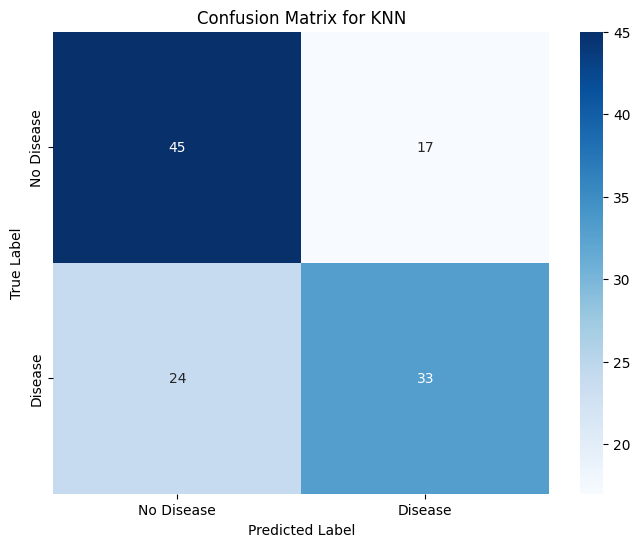

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your KNN model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Multi layer perceptron**


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the model on the training data
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.773109243697479

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.78        62
           1       0.77      0.75      0.76        57

    accuracy                           0.77       119
   macro avg       0.77      0.77      0.77       119
weighted avg       0.77      0.77      0.77       119



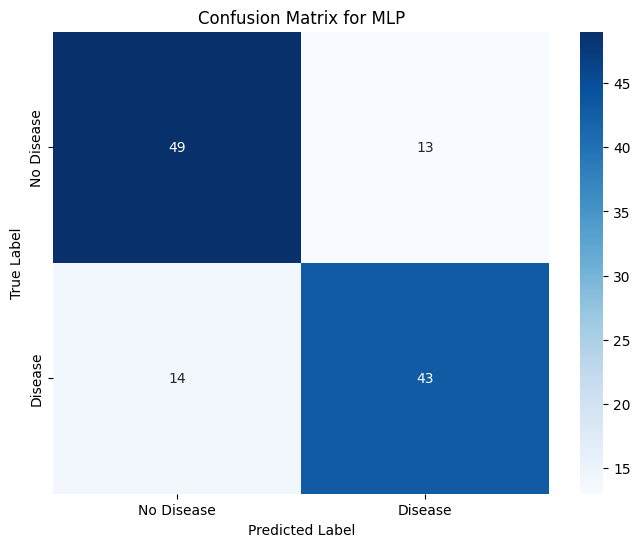

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your SVM model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Decision Tree Classifier **

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(max_depth=10)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74        62
           1       0.73      0.65      0.69        57

    accuracy                           0.71       119
   macro avg       0.72      0.71      0.71       119
weighted avg       0.72      0.71      0.71       119



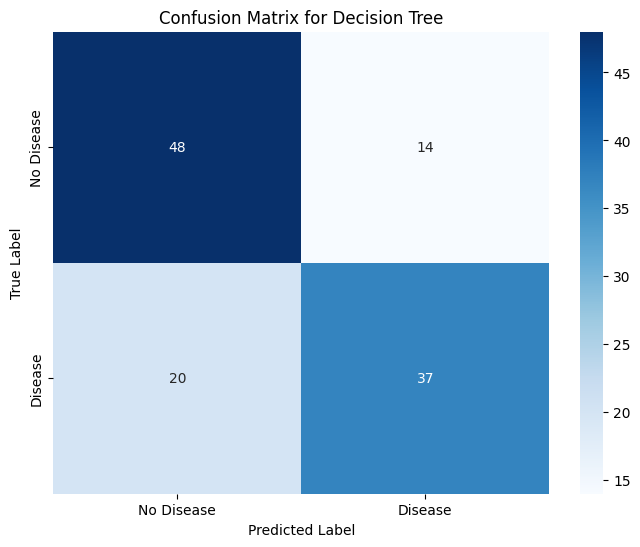

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your DT model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf=RandomForestClassifier(random_state=3)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8487394957983193

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        62
           1       0.87      0.81      0.84        57

    accuracy                           0.85       119
   macro avg       0.85      0.85      0.85       119
weighted avg       0.85      0.85      0.85       119



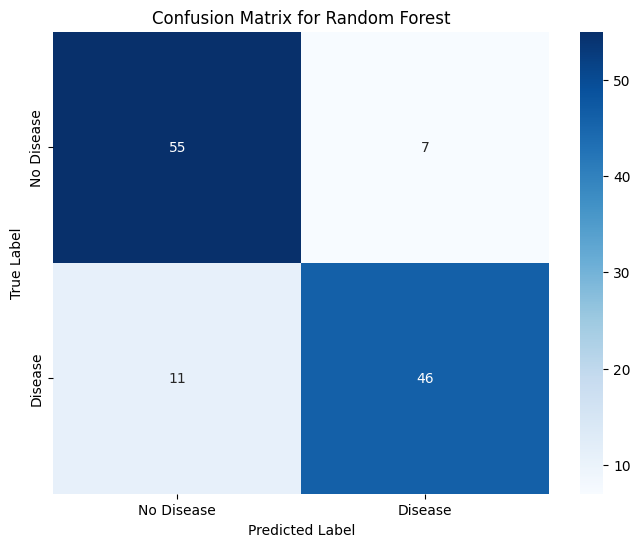

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your SVM model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Feature Selection with Chi Square**

In [ ]:
from sklearn.feature_selection import chi2

chi2_scores, p_values = chi2(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns,
                              'Chi2 Score': chi2_scores})
feature_scores = feature_scores.sort_values('Chi2 Score', ascending=False)

print(feature_scores)

     Feature  Chi2 Score
7    thalach  175.881654
12      thal   87.903888
11        ca   82.730613
9    oldpeak   59.269567
8      exang   35.508090
4       chol   30.055423
0        age   22.917697
2         cp   21.352432
10     slope   20.818579
3   trestbps    9.127651
6    restecg    8.134652
1        sex    7.444195
5        fbs    0.002547


In [ ]:
k = 7
selected_features = feature_scores['Feature'][:k].tolist()
print(selected_features)

['thalach', 'thal', 'ca', 'oldpeak', 'exang', 'chol', 'age']


In [ ]:
X=X[selected_features]
print(X)

     thalach  thal  ca  oldpeak  exang   chol  age
0      131.0     0   1      0.1      0  234.0   69
1      151.0     0   2      1.8      0  239.0   69
2      114.0     0   0      2.6      0  226.0   66
3      174.0     0   1      1.4      0  282.0   65
4      144.0     0   0      1.8      1  211.0   64
..       ...   ...  ..      ...    ...    ...  ...
292    181.0     2   0      0.0      0  223.0   40
293    140.0     2   0      1.2      0  219.0   39
294    130.0     2   0      1.6      1  198.0   35
295    182.0     0   0      1.4      0  183.0   35
296    156.0     2   0      0.0      1  282.0   35

[297 rows x 7 columns]


In [ ]:
X_encoded=pd.get_dummies(df,columns=[ 'cp','exang','ca','thal'])
X_encoded.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,oldpeak,slope,condition,...,cp_3,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,1,160.0,234.0,1,2,131.0,0.1,1,0,...,False,True,False,False,True,False,False,True,False,False
1,69,0,140.0,239.0,0,0,151.0,1.8,0,0,...,False,True,False,False,False,True,False,True,False,False
2,66,0,150.0,226.0,0,0,114.0,2.6,2,0,...,False,True,False,True,False,False,False,True,False,False
3,65,1,138.0,282.0,1,2,174.0,1.4,1,1,...,False,True,False,False,True,False,False,True,False,False
4,64,1,110.0,211.0,0,2,144.0,1.8,1,0,...,False,False,True,True,False,False,False,True,False,False


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=8063)

**Support Vector Machine**

In [ ]:
clf = LinearSVC(C=0.01,tol= 0.01,loss= 'squared_hinge')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy of SVM is: ",accuracy_score(y_test,y_pred))

print("Classification report of SVM is:\n",classification_report(y_test,y_pred))

Accuracy of SVM is:  0.9243697478991597
Classification report of SVM is:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        62
           1       0.93      0.91      0.92        57

    accuracy                           0.92       119
   macro avg       0.92      0.92      0.92       119
weighted avg       0.92      0.92      0.92       119



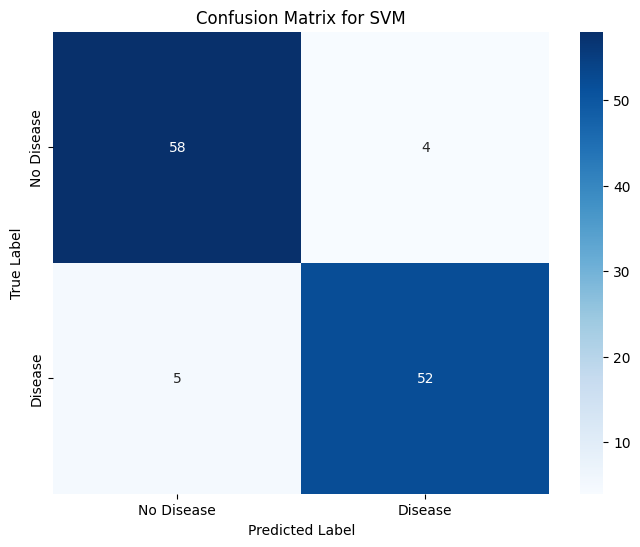

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=98,C=1.0,penalty='l2')

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9831932773109243

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.97      1.00      0.98        57

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


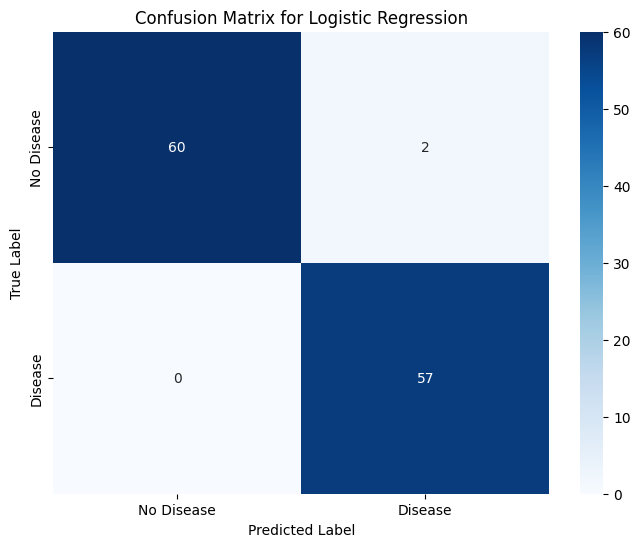

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6554621848739496

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69        62
           1       0.66      0.58      0.62        57

    accuracy                           0.66       119
   macro avg       0.66      0.65      0.65       119
weighted avg       0.66      0.66      0.65       119



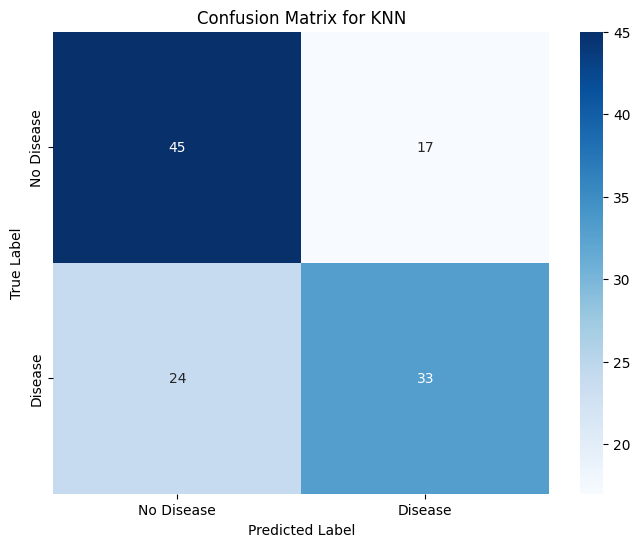

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf=RandomForestClassifier(n_estimators=15,random_state=6,criterion='gini',max_features='sqrt')
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9831932773109243

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        57

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



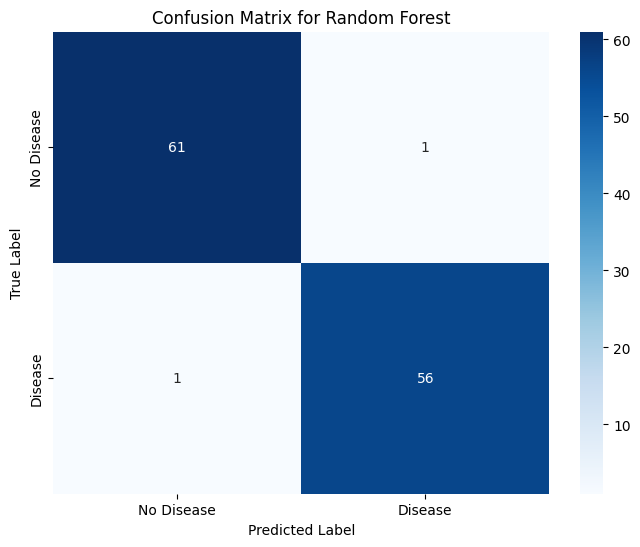

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your SVM model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt = DecisionTreeClassifier(random_state=30,max_features='sqrt',criterion='gini')
# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9663865546218487

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.95      0.98      0.97        57

    accuracy                           0.97       119
   macro avg       0.97      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



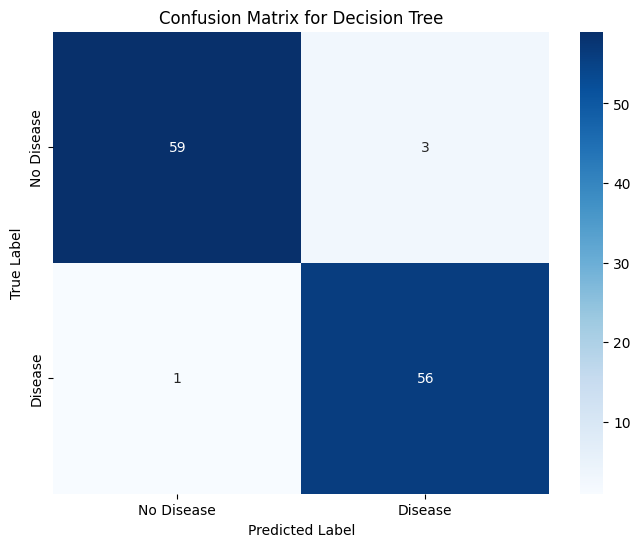

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your SVM model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
# Initialize MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=2,activation='relu',early_stopping=False)

# Fit the model on the training data
mlp.fit(X_train, y_train)

# Predict on the test data
y_pred = mlp.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9327731092436975

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94        62
           1       0.96      0.89      0.93        57

    accuracy                           0.93       119
   macro avg       0.94      0.93      0.93       119
weighted avg       0.93      0.93      0.93       119



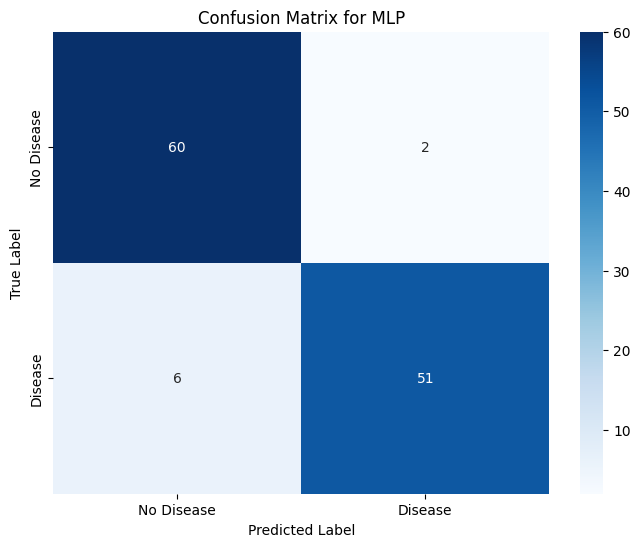

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test and y_pred from your SVM model
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for MLP')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Model Accuracy: 0.9831932773109243

Ensemble Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        62
           1       0.97      1.00      0.98        57

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



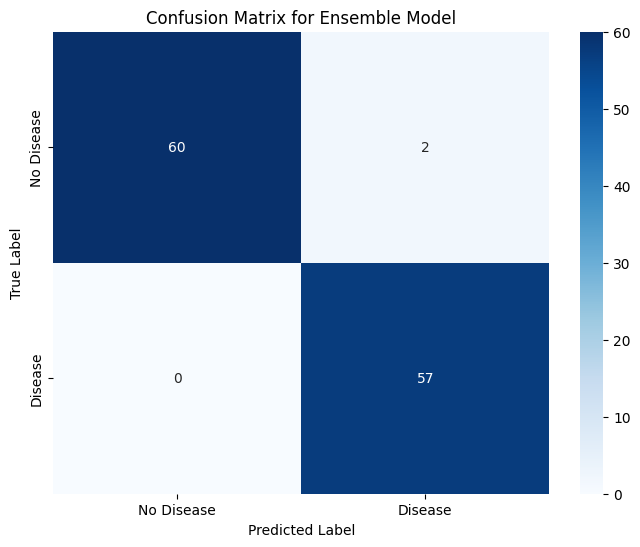

In [ ]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[
    ('svm', clf),
    ('logistic', log_reg),
    ('decision_tree', dt)
], voting='hard', weights=[1, 3, 1])

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("\nEnsemble Model Classification Report:\n", classification_report(y_test, y_pred_ensemble))

cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ensemble, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Ensemble Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()